In [62]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss

In [98]:
df=pd.read_csv("/Users/dariareichkina/Projects/Project4/Resources/application_train.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [ ]:
#columns_stay = [""]

In [ ]:
#columns_2 = ["CODE_GENDER", "FLAG_OWN_CAR", "CNT_CHILDREN", "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_TYPE_SUITE", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE", "DAYS_BIRTH", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OWN_CAR_AGE", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI"]

TARGET
NAME_CONTRACT_TYPE
FLAG_OWN_REALTY
AMT_INCOME_TOTAL
AMT_CREDIT
NAME_INCOME_TYPE
NAME_FAMILY_STATUS
REGION_POPULATION_RELATIVE
DAYS_EMPLOYED
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
REGION_RATING_CLIENT_W_CITY
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE

TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR

df_copy.drop(["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR", "DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "EMERGENCYSTATE_MODE", "WALLSMATERIAL_MODE", "TOTALAREA_MODE", "HOUSETYPE_MODE", "FONDKAPREMONT_MODE", "NONLIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LANDAREA_MEDI", "FLOORSMIN_MEDI", "FLOORSMAX_MEDI"], axis=1, inplace=True)

In [7]:
df.drop(["APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE"], axis = 1, inplace = True)

In [8]:
df.shape

(307511, 78)

In [9]:
df1 = df.copy()

In [14]:
df1.isna().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 78, dtype: int64

In [16]:
df1.fillna(method='ffill', inplace=True)

In [82]:
categorical_columns = []
for column in df1.columns:
    if df1[column].dtype == 'object' or df1[column].dtype.name == 'category':
        categorical_columns.append(column)
    elif df1[column].nunique() <= 15:
        categorical_columns.append(column)

print("Categorical columns:", categorical_columns)

Categorical columns: ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUM

In [83]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

In [84]:
df1=pd.concat([df1[df1.TARGET==0].sample(frac=0.1),df1[df1.TARGET==1]])

In [88]:
X = df1.drop(['TARGET'], axis=1)
y = df1['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [89]:
params = {
    'boosting_type': 'gbdt',
    'metric': ['auc', 'binary_logloss'],
    'learning_rate': 0.1,
    'n_estimators':1000,
    'num_leaves':400,
    'max_depth': 200,
    'objective': 'binary',
    'is_unbalance': True
}
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],)

[LightGBM] [Info] Number of positive: 19859, number of negative: 2262
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3628
[LightGBM] [Info] Number of data points in the train set: 22121, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.897744 -> initscore=2.172408
[LightGBM] [Info] Start training from score 2.172408


LGBMClassifier()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

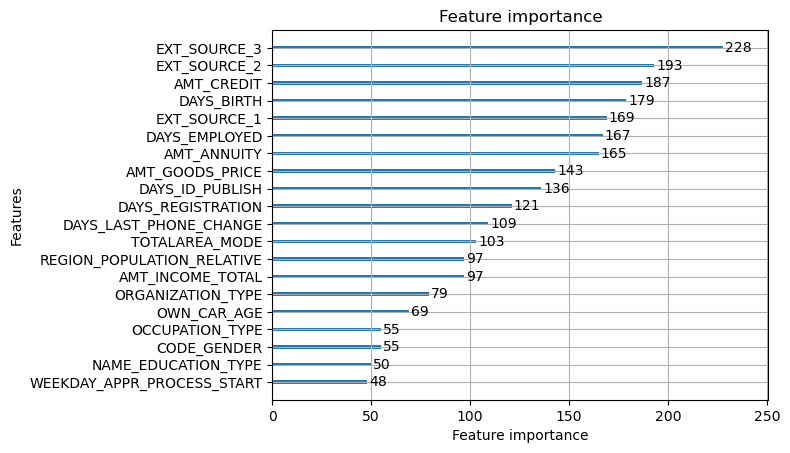

In [76]:
lgb.plot_importance(clf,max_num_features=20)

In [90]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05       565
           1       0.90      1.00      0.95      4966

    accuracy                           0.90      5531
   macro avg       0.70      0.51      0.50      5531
weighted avg       0.86      0.90      0.85      5531



In [46]:
df2=df1.copy()

In [47]:
df2.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
260693,0,0,1,1,0,2,225000.0,1125000.0,47794.5,1125000.0,...,0,0,0,0,0,0,0,0.0,0,3.0
89014,0,0,0,1,1,2,180000.0,835380.0,42781.5,675000.0,...,0,0,0,0,1,0,0,0.0,0,2.0
166909,0,0,1,0,0,0,352350.0,2114100.0,55768.5,2114100.0,...,0,0,0,0,0,0,0,0.0,0,3.0
278868,0,0,0,0,1,0,90000.0,238500.0,16960.5,238500.0,...,0,0,0,0,0,0,0,0.0,0,0.0
61853,0,0,1,1,0,0,81000.0,143910.0,14364.0,135000.0,...,0,0,0,0,0,0,0,0.0,0,0.0


In [48]:
df2.drop(["NAME_CONTRACT_TYPE", "CNT_CHILDREN", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"], axis = 1, inplace = True)

In [49]:
df2=pd.concat([df2[df2.TARGET==0].sample(frac=0.1),df2[df2.TARGET==1]])

In [56]:
X = df2.drop(['TARGET'], axis=1)
y = df2['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [64]:
params = {
    'boosting_type': 'gbdt',
    'metric': ['auc', 'binary_logloss'],
    'learning_rate': 0.05,
    'n_estimators':6000,
    'num_leaves':300,
    'max_depth': 200,
    'objective': 'binary',
    'is_unbalance': True
}
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],)

[LightGBM] [Info] Number of positive: 18619, number of negative: 2120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3622
[LightGBM] [Info] Number of data points in the train set: 20739, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.897777 -> initscore=2.172766
[LightGBM] [Info] Start training from score 2.172766


LGBMClassifier()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

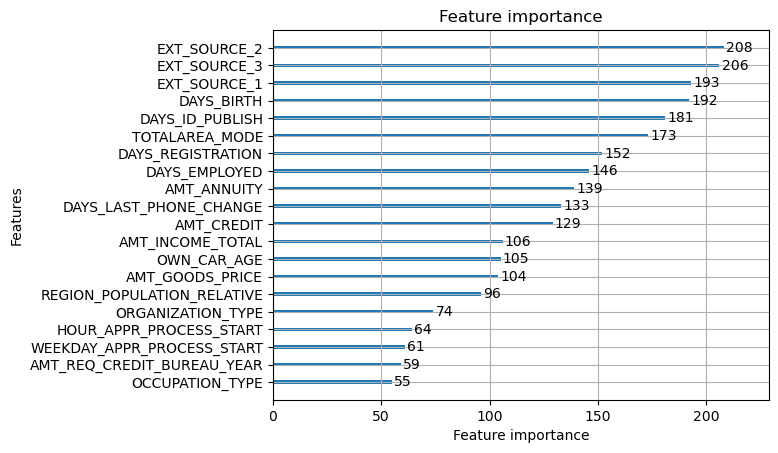

In [59]:
lgb.plot_importance(clf,max_num_features=20)

In [60]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.03      0.06       707
           1       0.90      1.00      0.95      6206

    accuracy                           0.90      6913
   macro avg       0.72      0.52      0.50      6913
weighted avg       0.86      0.90      0.86      6913



<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

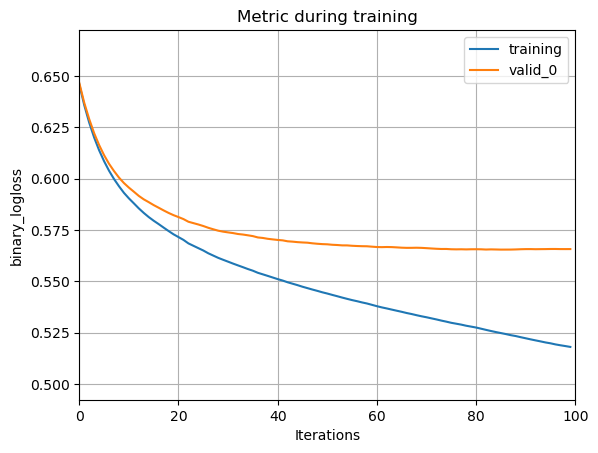

In [122]:
lgb.plot_metric(clf)

In [66]:
df3 = df2.copy()

In [67]:
df2.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 

In [68]:
df3.drop(['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17'], axis=1, inplace = True )

In [69]:
df3=pd.concat([df3[df3.TARGET==0].sample(frac=0.1),df3[df3.TARGET==1]])

In [79]:
X = df3.drop(['TARGET'], axis=1)
y = df3['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [80]:
params = {
    'boosting_type': 'gbdt',
    'metric': ['auc', 'binary_logloss'],
    'learning_rate': 0.1,
    'n_estimators':200,
    'num_leaves':50,
    'max_depth': 40,
    'objective': 'binary',
    'is_unbalance': True
}
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],)

[LightGBM] [Info] Number of positive: 17377, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3591
[LightGBM] [Info] Number of data points in the train set: 17575, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.988734 -> initscore=4.474636
[LightGBM] [Info] Start training from score 4.474636


LGBMClassifier()

In [81]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.99      1.00      0.99      7448

    accuracy                           0.99      7533
   macro avg       0.49      0.50      0.50      7533
weighted avg       0.98      0.99      0.98      7533



/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

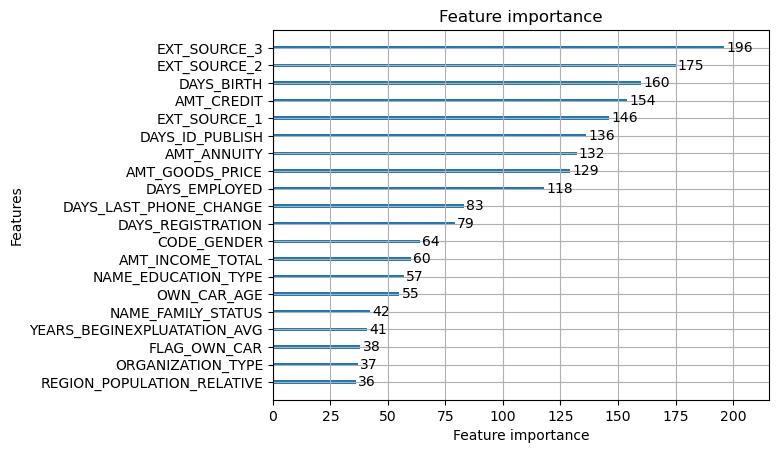

In [121]:
lgb.plot_importance(clf,max_num_features=20)

In [99]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        categorical_columns.append(column)
    elif df[column].nunique() <= 15:
        categorical_columns.append(column)

print("Categorical columns:", categorical_columns)

Categorical columns: ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DO

In [103]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [102]:
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [101]:
df.fillna(method='ffill', inplace=True)

In [95]:
df.isna().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 78, dtype: int64

In [104]:
df.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [105]:
df=pd.concat([df[df.TARGET==0].sample(frac=0.15),df[df.TARGET==1]])

In [106]:
df.TARGET.value_counts(normalize=True)

0    0.630734
1    0.369266
Name: TARGET, dtype: float64

In [107]:
df.shape

(67228, 122)

In [108]:
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [109]:
params = {
    'boosting_type': 'gbdt',
    'metric': ['auc', 'binary_logloss'],
    'learning_rate': 0.1,
    'n_estimators':200,
    'num_leaves':50,
    'max_depth': 50,
    'objective': 'binary',
    'is_unbalance': True
}
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],)

[LightGBM] [Info] Number of positive: 18619, number of negative: 31802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11153
[LightGBM] [Info] Number of data points in the train set: 50421, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369271 -> initscore=-0.535347
[LightGBM] [Info] Start training from score -0.535347


LGBMClassifier()

In [110]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79     10601
           1       0.65      0.46      0.54      6206

    accuracy                           0.71     16807
   macro avg       0.69      0.66      0.66     16807
weighted avg       0.70      0.71      0.70     16807



In [119]:
params = {
    'boosting_type': 'gbdt',
    'metric': ['auc', 'binary_logloss', 'binary_error'],
    'learning_rate': 0.3,
    'n_estimators':1000,
    'num_leaves':300,
    'max_depth': 300,
    'objective': 'binary',
    'is_unbalance': True
}
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],)

[LightGBM] [Info] Number of positive: 18619, number of negative: 31802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11153
[LightGBM] [Info] Number of data points in the train set: 50421, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369271 -> initscore=-0.535347
[LightGBM] [Info] Start training from score -0.535347


LGBMClassifier()

In [120]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79     10601
           1       0.65      0.46      0.54      6206

    accuracy                           0.71     16807
   macro avg       0.69      0.66      0.66     16807
weighted avg       0.70      0.71      0.70     16807

